## Chapter 03 회귀 알고리즘과 모델 규제 ▶️농어의 무게를 예측하라!

### 03-2 선형 회귀 ▶️ 사이킷런으로 선형 회귀 모델 만들어 보기

- KNN은 근접한 이웃들의 값을 참고로 하기 때문에, 기존 데이터에서 상당부분 벗어나는 케이스가 등장할 경우 예측에 한계가 발생함 
- 예를 들어 길이가 50cm인 특대형 농어의 무게를 예측하려 할때, 기존 데이터셋에서 최대 길이인 45cm 정도일때의 무게로써 예측할 수 밖에 없음 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

print( perch_length.shape )
print( perch_weight.shape )

(56,)
(56,)


In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)

print( train_input.shape )
print( test_input.shape )
print( train_target.shape )
print( test_target.shape )

(42,)
(14,)
(42,)
(14,)


In [4]:
## reshape를 사용하여, train_input과 test_input의 형태를 2차원으로 변환 : (42,) -> (42,1) & (14,) -> (14,1)
train_input = train_input.reshape(-1, 1)  ## = train_input.reshape(42, 1)
test_input = test_input.reshape(-1, 1)

print( train_input.shape )
print( test_input.shape )

(42, 1)
(14, 1)


In [8]:
## linear regression 사용 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_input, train_target)
print( model.score(train_input, train_target) )
print( model.score(test_input, test_target) )

0.939846333997604
0.8247503123313558


In [10]:
## linear regression model의 계수확인 
print( model.intercept_ )
print( model.coef_ )

-709.0186449535477
[39.01714496]


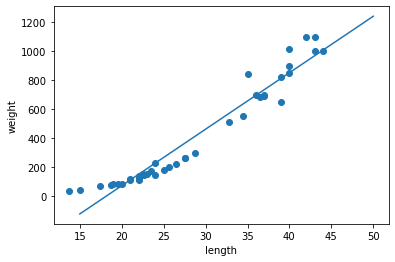

In [12]:
plt.scatter(train_input, train_target)
## 농어 길이 15와 50일때의 무게를 잇는 직선 
plt.plot([15, 50], [model.intercept_ + 15*model.coef_ , model.intercept_ + 50*model.coef_ ])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

------------------------------------------------------------------------------
- 분포를 보니 선형 보다는 2차 방정식을 사용하는 것이 좀더 적합해 보임

In [14]:
## input값을 제곱하여 새로운 컬럼 데이터를 추가한다.(기존의 값도 버릴 필요 없이 같이 학습에 사용한다.)
train_square = np.column_stack((train_input**2, train_input))
test_square = np.column_stack((test_input**2, test_input))

print(train_square.shape)
print(test_square.shape)

(42, 2)
(14, 2)


In [15]:
model_2 = LinearRegression()
model_2.fit(train_square, train_target)
print( model_2.score(train_square, train_target) )
print( model_2.score(test_square, test_target) )

0.9706807451768623
0.9775935108325122


In [16]:
print( model_2.intercept_ )
print( model_2.coef_ )

116.05021078278304
[  1.01433211 -21.55792498]


- 방정식 : y = 116.05021078278304 + 1.01433211*x^2 -21.55792498*x 

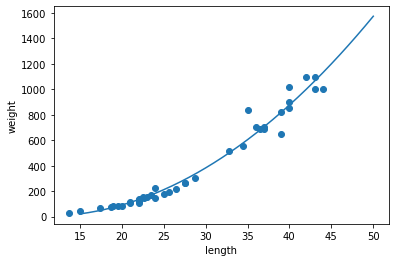

In [17]:
plt.scatter(train_input, train_target)
## 농어 길이 15와 50까지의 무게를 잇는 곡선 
point = np.arange(15, 51)
plt.plot(point, model_2.intercept_ + 1.01433211*point**2 - 21.55792498*point)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()